In [3]:
import numpy as np


In [4]:
def distance(p, q):
    """Distância entre dois pontos 2D.
     metric: 'euclidean'
    """

    p = np.asarray(p)
    q = np.asarray(q)

    return float(np.linalg.norm(p - q))

In [5]:
def train_test_split (x, y, test_size = 0.2, random_seed = None):
    x = np.array(x)
    y = np.array(y)

    if random_seed:
        np.random.seed(random_seed)

    n_rows = x.shape[0]
    idx = np.random.permutation(n_rows)

    split_idx = int(n_rows * test_size)

    test_idx = idx[:split_idx]
    train_idx = idx[split_idx:]

    x_train = x[train_idx]
    x_test = x[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    return x_train, x_test, y_train, y_test



In [6]:
def standardize_data(x_train, x_test):
    x_train_std = np.array(x_train, dtype=float)
    x_test_std = np.array(x_test, dtype=float)

    mean = np.mean(x_train_std, axis=0)
    stdev = np.std(x_train_std, axis=0)

    for i in range(len(stdev)):
        if stdev[i] == 0:
            stdev[i] = 1

    x_train_std = (x_train_std - mean) / stdev
    x_test_std = (x_test_std - mean) / stdev
    
    return x_train_std, x_test_std

In [7]:
def KNN(x_train, x_test, y_train, k = 5, standardize = False):
    y_pred = []

    if standardize:
        x_train_std, x_test_std = standardize_data(x_train, x_test)
    else:
        x_train_std = x_train
        x_test_std = x_test
    

    for i in x_test_std:
        distance_list = []
        for j in range(len(x_train_std)):
            dist = distance(i, x_train_std[j])
            distance_list.append((dist, y_train[j]))
            
        distance_list.sort()

        k_neighbor = distance_list[:k]

        targets = []
        for v in k_neighbor:
            targets.append(v[1])

        counter = {}
        for vote in targets:
            if vote in counter:
                counter [vote] += 1
            else:
                counter[vote] = 1


        best = max(counter, key = counter.get)
        y_pred.append(best)


    return np.array(y_pred)

Precisão do KNN (K = 5): 82.22%


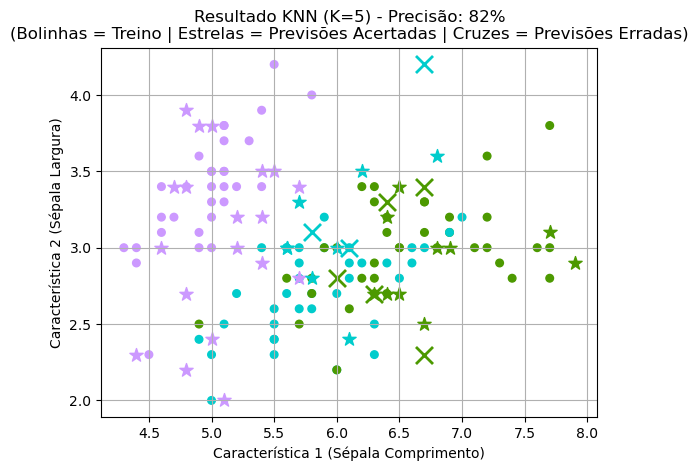

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris_data = load_iris()

x = iris_data.data[:, :2] #buscamos apenas das colunas do dataset para poder visualizar de forma gráfica
y = iris_data.target

#O utilizador pode indicar quantos neighbors e se deseja normalizar os dados
k_value = 5
standardize = True

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_seed=42)

y_pred = KNN(x_train, x_test, y_train, k=k_value, standardize=standardize)

accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'Precisão do KNN (K = {k_value}): {accuracy:.2%}')

plt.scatter(x_train[:, 0], x_train[:, 1], c=cmap_train, s=30)

colors = ['#CC99FF', '#00CCCC', '#4C9900']
cmap_train = [colors[i] for i in y_train]

for i in range(len(x_test)):
    class_color = colors[y_pred[i]]
    if y_pred[i] == y_test[i]:
        plt.scatter(x_test[i, 0], x_train[i, 1], color=class_color, marker="*", s=100) #estrelas para representarem os pontos de acerto de previsão
    else:
        plt.scatter(x_test[i, 0], x_train[i, 1], color=class_color, marker="x", linewidths=2, s=150) #x para representar os erros de previsão

plt.title(f'Resultado KNN (K={k_value}) - Precisão: {accuracy:.0%}\n(Bolinhas = Treino | Estrelas = Previsões Acertadas | Cruzes = Previsões Erradas)')
plt.xlabel('Característica 1 (Sépala Comprimento)')
plt.ylabel('Característica 2 (Sépala Largura)')
        
plt.grid(True)

plt.show()